In [67]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
!pip install tabulate colorama

**Ecuaciones de NRTL**
\begin{equation}
\ln\gamma_{1}=x_{2}^{2}[\tau_{21}(\frac{G_{21}}{x_{1}+x_{2}G_{21}})^{2}+\frac{G_{12}\tau_{12}}{(x_{2}+x_{1}G_{12})^{2}}]
\end{equation}

\begin{equation}
\ln\gamma_{2}=x_{1}^{2}[\tau_{12}(\frac{G_{12}}{x_{2}+x_{1}G_{12}})^{2}+\frac{G_{21}\tau_{21}}{(x_{1}+x_{2}G_{21})^{2}}]
\end{equation}

\begin{equation}
G_{12}=\exp(-\alpha\tau_{12})
\end{equation}

\begin{equation}
G_{21}=\exp(-\alpha\tau_{21})
\end{equation}

\begin{equation}
\tau_{12}=\frac{b_{12}}{RT}
\end{equation}

\begin{equation}
\tau_{21}=\frac{b_{21}}{RT}
\end{equation}


Tabla de composiciones con colores:
+----+-------+-------+-----------+------------+----------+----------+------------+------------+---------+│
|    |   X_1 |   X_2 |       Y_1 |        Y_2 |    Act_1 |    Act_2 |   P1(mmHg) |   P2(mmHg) |    T(K) |│
+====+=======+=======+===========+============+==========+==========+============+============+=========+│
|  0 |  0.01 |  0.99 | 0.0228565 | 0.977144   | 0.984847 | 0.999998 |    17.3709 |  742.629   | 383.316 |│
+----+-------+-------+-----------+------------+----------+----------+------------+------------+---------+│
|  1 |  0.02 |  0.98 | 0.0452301 | 0.95477    | 0.985834 | 0.999994 |    34.3749 |  725.625   | 382.86  |│
+----+-------+-------+-----------+------------+----------+----------+------------+------------+---------+│
|  2 |  0.03 |  0.97 | 0.06713   | 0.93287    | 0.986786 | 0.999986 |    51.0188 |  708.981   | 382.408 |│
+----+-------+-------+-----------+------------+----------+----------+------------+------------+---------+│
|

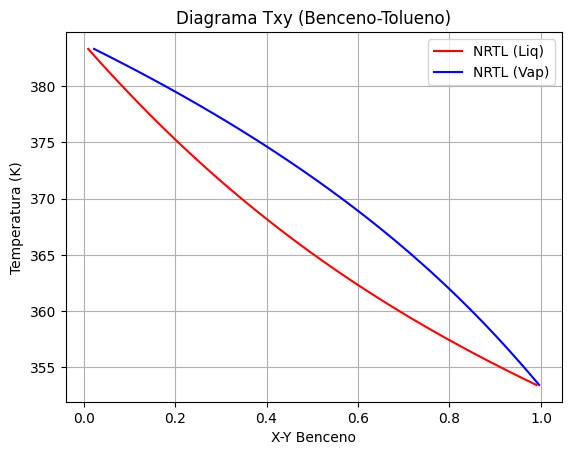

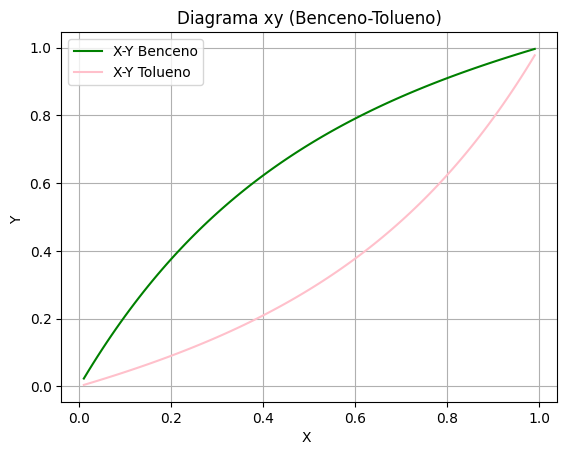

99


In [68]:
from math import exp,log,fabs
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style
import matplotlib.pyplot as plt

def Tauij(aij,bij,T):
  return aij+(bij/T)

def Gij(cij,tij):
  return exp(-cij*tij)

def actividad1(tau12,tau21,G12,G21,x1,x2):
  return exp((x2**2)*(tau21*(G21/(x1+x2*G21))**2+(tau12*G12/((x2+x1*G12)**2))))

def actividad2(tau12,tau21,G12,G21,x1,x2):
  return exp((x1**2)*(tau12*(G12/(x2+x1*G12))**2+(tau21*G21/((x1+x2*G21)**2))))

def Antoine(A,B,C,T): #Ecuación de Antoine
  return 10**(A-(B/(T+C)))
def g(p0,p1,fx1,fx0):
  return p1-(fx1*(p1-p0))/(fx1-fx0)

a12=-2.885
b12=1124
c12=0.3
a21=2.191
b21=-863.7
c21=0
p0=328.15 #K
p1=330.15
C_benceno=[6.90565,1211.033,220.79]
C_tolueno=[6.95464,1344.8,219.482]




x1=[]
for i in range(99):
  x1.append(0.01*(i+1))
x2=[]
act1=[]
act2=[]
y1=[]
y2=[]
T1=[]
TRaoult=[]
yRaoult=[]
Pp1=[]
Pp2=[]
n=len(x1)

ntot=len(x1)

for i in range(n):
  x2.append(1-x1[i])
P=760 #mmHg

az=[]
ALFA=[]
Tz=[]
TOL=0.0000001
M=1000
for i in range(n):
  for j in range(M):
    Taui12x=Tauij(a12,b12,p0)
    Taui21x=Tauij(a21,b21,p0)
    G12x=Gij(c12,Taui12x)
    G21x=Gij(c21,Taui21x)
    Pv_bencenox=Antoine(C_benceno[0],C_benceno[1],C_benceno[2],p0-273.15)
    Pv_toluenox=Antoine(C_tolueno[0],C_tolueno[1],C_tolueno[2],p0-273.15)
    gamma1x=actividad1(Taui12x,Taui21x,G12x,G21x,x1[i],x2[i])
    gamma2x=actividad2(Taui12x,Taui21x,G12x,G21x,x1[i],x2[i])
    P1x=gamma1x*x1[i]*Pv_bencenox
    P2x=gamma2x*x2[i]*Pv_toluenox
    Pptx=P1x+P2x-P

    Taui12y=Tauij(a12,b12,p1)
    Taui21y=Tauij(a21,b21,p1)
    G12y=Gij(c12,Taui12y)
    G21y=Gij(c21,Taui21y)
    Pv_bencenoy=Antoine(C_benceno[0],C_benceno[1],C_benceno[2],p1-273.15)
    Pv_toluenoy=Antoine(C_tolueno[0],C_tolueno[1],C_tolueno[2],p1-273.15)
    gamma1y=actividad1(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i])
    gamma2y=actividad2(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i])
    P1y=gamma1y*x1[i]*Pv_bencenoy
    P2y=gamma2y*x2[i]*Pv_toluenoy
    Ppty=P1y+P2y-P
    p=g(p0,p1,Ppty,Pptx)
    if fabs(p-p1)<TOL:
      break
    else:
      p0=p1
      p1=p


  T1.append(p0)
  act1.append(actividad1(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i]))
  act2.append(actividad2(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i]))
  Pp1.append(act1[i]*x1[i]*Pv_bencenoy)
  Pp2.append(act2[i]*x2[i]*Pv_toluenoy)
  y1.append(act1[i]*x1[i]*Pv_bencenoy/P)
  y2.append(act2[i]*x2[i]*Pv_toluenoy/P)
  K1=y1[i]/x1[i]
  K2=y2[i]/x2[i]
  ALFA.append(K1/K2)
  if fabs(y1[i]-x1[i])<0.005:
    az.append(x1[i])
    Tz.append(T1[i])
  else:
    continue




data = {
  "X_1": x1,
  "X_2": x2,
  "Y_1": y1,
  "Y_2": y2,
  "Act_1":act1,
  "Act_2":act2,
  "P1(mmHg)":Pp1,
  "P2(mmHg)":Pp2,
  "T(K)":T1


}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'



print("Tabla de composiciones con colores:")
print(colored_table)



plt.plot(x1,T1, color='red', label='NRTL (Liq)')
plt.plot(y1,T1, color='blue', label='NRTL (Vap)')


plt.xlabel('X-Y Benceno')
plt.ylabel('Temperatura (K)')
plt.title('Diagrama Txy (Benceno-Tolueno)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x1,y1, color='green', label='X-Y Benceno')
plt.plot(x2,y2, color='pink', label='X-Y Tolueno')


plt.xlabel('X ')
plt.ylabel('Y ')
plt.title('Diagrama xy (Benceno-Tolueno)')
plt.legend()
plt.grid(True)
plt.show()

alfa_coefx=np.polyfit(x1,ALFA,10) #Se ajustan los puntos por medio de un ajuste polinómico
alfa_coefy=np.polyfit(y1,ALFA,10)


#alfa_polix=np.polyval(alfa_coefx,x)
#alfa_poliy=np.polyval(alfa_coefy,y)


# DATOS DE EQUILIBRIO----------------------------------------------
x=np.arange(0,1.01,0.01)
alfa_x=np.polyval(alfa_coefx,x)
y=(alfa_x*x)/(1+x*(alfa_x-1))

print(ntot)

Se desea separar una mezcla de acetona-benceno que se alimenta a 100 kmol/h.
* *Fracción en alimentación*: 0.45
* *Pureza destilado*: 0.95
* *Pureza fondos: 0.10
* *Razón de reflujo*: 1.755

De acuerdo a los resultados del Método de Wilson, la temperatura de burbuja de la mezcla es de 65°C.

La alimentación entra a condiciones de:
* Líquido saturado




# **MÉTODO MCCABE-THIELE**

1.2574921194663695
0.5049579340216248
0.7183933359885686
La razón de ebullición es: 2.3662
Flujo del destilado: 41.176471 kmol/h
Flujo residual: 58.823529 kmol/h
Flujo de vapor (Fondo): 139.190388 kmol/h
Flujo de líquido (Domo): 72.264706 kmol/h
Flujo de vapor (Domo): 113.441176 kmol/h
Número de etapas: 11
Plato de alimentación: 6


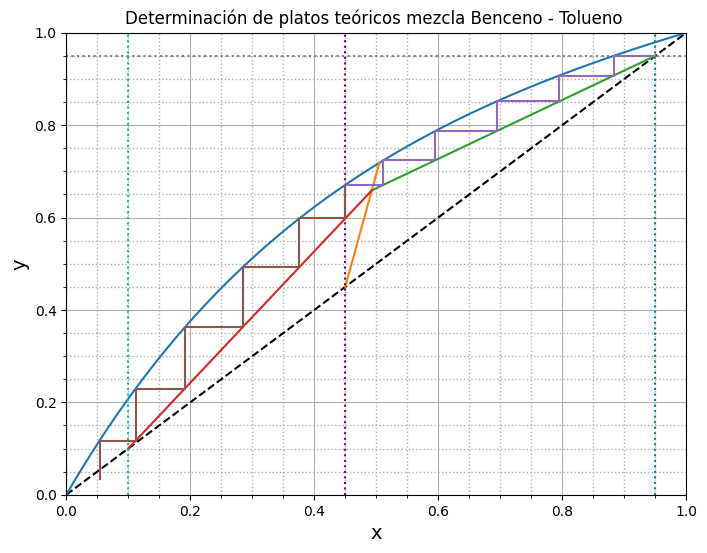

In [69]:
comp1='Benceno'
comp2='Tolueno'
# Benceno , Tolueno
C1 = [4.5346e+7, 4.9507e+7]
C2 = [0.39053, 0.37742]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.2, 591.8]         # Temperatura crítica en K
pm = [78.114 , 92.138]       # Peso molecular
T = 54.4+273.15             # Temperatura del sistema en K

tF=54.4    #°C
tburbuja = 93.48
z=0.45 #Fracción de alimentación
F=100   # kmol/h
R=1.755 #Razón de reflujo
xD=0.95 #Pureza del destilado
xB=0.10 #Pureza de los fondos

#BALANCE DE MATERIA
B = ((F*z)-(F*xD))/(xB-xD)    # fondos
D = F-B                       # destilado

n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)

for i in range (n):
    Tr[i] = T/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)
    CL[i] = Hv[i]/4184

CL_prom = (z*CL[0]) + ((1-z)*CL[1])
PMF = 100 / ((z*100/pm[0])+(1-z)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
Lmda = CL_prom/PMF  # Calor latente de vaporización de la alimentación (cal/g)

def cp_tolueno(T): # cal/g°C
  cof=[0.1488,3.24e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 1
  return (cp)
def cp_benceno(T):
  cof=[0.1265,2.34e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 2
  return (cp)

cp1 = cp_benceno(T)
cp2 = cp_tolueno(T)
cptotal = (cp1+cp2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros


q = 1 + ((cptotal*(tburbuja-tF))/Lmda) #Cálculo de q para una alimentación fría (no saturada)
print(q)

# CÁLCULO DE PUNTO PINCH
#línea de referencia
if q==1:   #Líquido saturado
    xP=z
    alfa=np.polyval(alfa_coefx,xP)
    yP=(alfa*xP)/(1+xP*(alfa-1))

if q==0:   #Vapor saturado
    yP=z
    alfa=np.polyval(alfa_coefy,yP)
    xP=yP/(alfa-(yP*(alfa-1)))
#-----------------------------------
else:
    i=1
    xit=0
    tol=0.0005
    e=1
    while e>tol:
        alfa=np.polyval(alfa_coefx,xit)
        xP=((alfa-1)*(z+q)-alfa+(((alfa-1)*(z+q)-alfa)**2+(4*z*(alfa-1)*q))**0.5)/(2*(alfa-1)*q)
        yP=(alfa*xP)/(1+xP*(alfa-1))
        alfa1=np.polyval(alfa_coefx,xP)
        e=abs(alfa1-alfa)
        xit=xP
        i=i+1
#----------------------------------------

xpinch=[z,xP]
ypinch=[z,yP]

print(xpinch[1])
print(ypinch[1])

xint=(z*(R+1)+xD*(q-1))/(q*(R+1)-R*(q-1)) #Cálculo del punto de intersección
yint=(R*xint/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
S=(xint-xB)/(yint-xint) #Cálculo de la razón S
print("La razón de ebullición es: %.4f"%S)


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado
V1=L+D #V1: Razón de vapor en la parte superior de la torre

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor (Fondo): %f kmol/h' %V)
print('Flujo de líquido (Domo): %f kmol/h' %L)
print('Flujo de vapor (Domo): %f kmol/h'%V1)


ms=(xD-yint)/(xD-xint)
xrec=np.linspace(xint,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms*xrec)+(xD/(R+1))
mi=(yint-xB)/(xint-xB)
xag=np.linspace(xB,xint,50) #Cálculo de la línea de operación de la zona de agotamiento
yag=(mi*xag)-(xB/S)


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0


while yr>yint: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XR[-2]
ya=YR[-2]
XA=np.array([xa])
YA=np.array([ya])




while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(mi*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch,ypinch)
plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(XR,YR)
axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch[0], color='purple', ls="dotted", label = 'XF')
axvline(xB, color='c', ls="dotted", label = 'XR')
plt.plot(XA,YA)

plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación: %i' %p_alim)

# **Diagrama Entalpía-Concentración**
## **Método de Ponchon-Savarit**

Tabla de composiciones con colores:
+----+-------+-------------+-----------+---------------+---------+│
|    |   X_1 |   H (Vapor) |       Y_1 |   h (Líquido) |    T(K) |│
+====+=======+=============+===========+===============+=========+│
|  0 |  0.01 |     38528.1 | 0.0228565 |     5245.23   | 383.316 |│
+----+-------+-------------+-----------+---------------+---------+│
|  1 |  0.02 |     38359.5 | 0.0452301 |     5156.99   | 382.86  |│
+----+-------+-------------+-----------+---------------+---------+│
|  2 |  0.03 |     38194.4 | 0.06713   |     5069.61   | 382.408 |│
+----+-------+-------------+-----------+---------------+---------+│
|  3 |  0.04 |     38032.7 | 0.0885654 |     4983.13   | 381.959 |│
+----+-------+-------------+-----------+---------------+---------+│
|  4 |  0.05 |     37874.2 | 0.109545  |     4897.54   | 381.514 |│
+----+-------+-------------+-----------+---------------+---------+│
|  5 |  0.06 |     37719   | 0.130079  |     4812.84   | 381.073 |│
+----+------

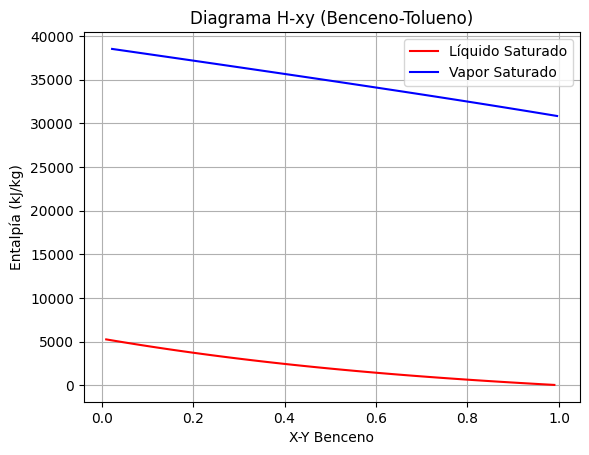

In [70]:
#Línea de saturación de líquido
def hsat(xa,cpa,T,T0,cpb,deltadis):
  return (xa*cpa*(T-T0))+((1-xa)*cpb*(T-T0))+deltadis
#Línea de saturación del vapor
def Hsat(ya,lambaa,cpya,T,T0,lambab,cpyb):
   return ya*(lambaa+cpya*(T-T0))+(1-ya)*(lambab+cpyb*(T-T0))
#Polinomio cp componente 2
def cp_tolueno(T):
  cof=[0.1488,3.24e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3))) #Polinomios Cp del componente 1
  return (cp)
#Polinomio cp componente 1
def cp_benceno(T):
  cof=[0.1265,2.34e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3))) #Polinomios Cp del componente 2
  return (cp)
#Polinomio cp vapor componente 2
def cp_toluenovap(T):
  cof=[0.09418,3.8e-4,-2.789e-7,8.0033e-11]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3))) #Polinomios Cp del componente 1
  return (cp)
#Polinomio cp vapor componente 1
def cp_bencenovap(T):
  cof=[0.07406,3.295e-4,-2.52e-7,7.757e-11]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3))) #Polinomios Cp del componente 2
  return (cp)

#Corrección de entalpía de vaporización componente 1
def lm1(cpa,tba,t0,lambaab,cpya):
  return cpa*(tba-t0)+lambaab-cpya*(tba-t0)
#Corrección de entalpía de vaporización componente 2
def lm2(cpb,tbb,t0,lambabb,cpyb):
  return cpb*(tbb-t0)+lambabb-cpyb*(tbb-t0)

C1 = [4.5346e+7, 4.9507e+7]
C2 = [0.39053, 0.37742]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.2, 591.8]         # Temperatura crítica en K
pm = [78.114 , 92.138]       # Peso molecular


T3=[80.1+273.15,110.6+273.15]
n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)
#Obtención de entalpías a temeperatura de ebullición
for i in range (n):
    Tr[i] = T3[i]/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)


Lmda1=Hv[0]/1000 #kJ/kg mol
Lmda2=Hv[1]/1000

T0=80.1 #°C
T2=110.6 #°C


deltadis=0
h=[]
H=[]
cp1=cp_benceno(T0)*1000 #kJ/kg mol k
cp2=cp_tolueno(T0)*1000

Lambda1=lm1(cp1,T0,T0,Lmda1,cp_bencenovap(T0)*1000)
Lambda2=lm2(cp2,T2,T0,Lmda2,cp_toluenovap(T2)*1000)


#Construcción de las líneas de saturación
for i in range(ntot):
  h1=hsat(x1[i],cp1,T1[i]-273.15,T0,cp2,deltadis)
  h.append(h1)

for i in range(ntot):
  H1=Hsat(y1[i],Lambda1,cp_bencenovap(T0)*1000,T1[i]-273.15,T0,Lambda2,cp_toluenovap(T2)*1000)
  H.append(H1)


data = {
  "X_1": x1,
  "H (Vapor)": H,
  "Y_1": y1,
  "h (Líquido)": h,
  "T(K)":T1


}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'



print("Tabla de composiciones con colores:")
print(colored_table)

alfa_coefh=np.polyfit(x1,h,10) #Se ajustan los puntos por medio de un ajuste polinómico
alfa_coefH=np.polyfit(y1,H,10)


alfa_h=np.polyval(alfa_coefh,x1)
alfa_H=np.polyval(alfa_coefH,y1)


plt.plot(x1,alfa_h, color='red', label='Líquido Saturado')
plt.plot(y1,alfa_H, color='blue', label='Vapor Saturado')


plt.xlabel('X-Y Benceno')
plt.ylabel('Entalpía (kJ/kg)')
plt.title('Diagrama H-xy (Benceno-Tolueno)')
plt.legend()
plt.grid(True)
plt.show()

# **Cálculo de Etapas Ideales**
## **Método de Ponchon-Savarit**

-70570.58931313662


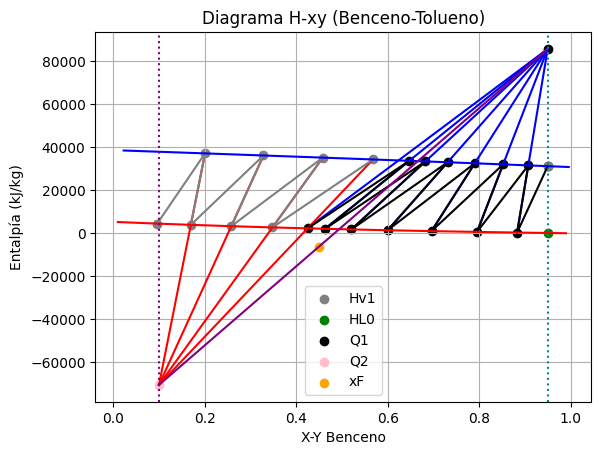

El número de etapas ideales es: 11
La mezcla debe alimentarse en el plato: 7


In [83]:
alfa_coefx=np.polyfit(x1,y1,10) #Se ajustan los puntos por medio de un ajuste polinómico
alfa_coefy=np.polyfit(y1,x1,10)
#Cálculo de Q
#Se evalúa los valores de entalpía en función de xD
HL0=np.polyval(alfa_coefh,xD)
Hv1=np.polyval(alfa_coefH,xD)
HLp=np.polyval(alfa_coefh,xpinch[1])
HVp=np.polyval(alfa_coefH,ypinch[1])


zh=HVp-q*(HVp-HLp)

Q=R*(Hv1-HL0)+Hv1 #Se valúa para obtener Q'
Q2=((Q-zh)/(xD-z))*(xB-z)+zh #Se evalúa para obtener Q''
print(Q2)
s=[xB,z,xD]
s1=[Q2,zh,Q]
#Línea guía de alimentación
alfa_coefop=np.polyfit(s,s1,2)
alfa_coefoper=np.polyval(alfa_coefop,s)
x_n=xD
y_n=xD
H_n=np.polyval(alfa_coefH,xD)
x2=[]
h=[]
j=0
while x_n > z:
  x2.append(y_n)
  h.append(H_n)

  x_n=np.polyval(alfa_coefy,y_n)
  h_n=np.polyval(alfa_coefh,x_n)
  x2.append(x_n)
  h.append(h_n)

  s2=[x_n,xD]
  s3=[h_n,Q]
  plt.plot(s2,s3,color="blue")
  def lin(x):
    return ((s3[1]-s3[0])/(s2[1]-s2[0]))*(x-s2[0])+s3[0]
  p0=x_n
  p1=x_n+0.01
  for i in range(M):
    a1=lin(p0)
    b1=np.polyval(alfa_coefH,p0)
    Pptx=a1-b1


    a2=lin(p1)
    b2=np.polyval(alfa_coefH,p1)
    Ppty=a2-b2
    p=g(p0,p1,Ppty,Pptx)
    if fabs(p-p1)<TOL:
      break
    else:
      p0=p1
      p1=p


  y_n=p0

  H_n=np.polyval(alfa_coefH,y_n)
  j=j+1

h_n=np.polyval(alfa_coefh,x_n)
x3=[]
h1=[]
jalim=[]
jalim.append(j)
while x_n > xB:


  s2=[x_n,xB]
  s3=[h_n,Q2]

  def lin(x):
    return ((s3[1]-s3[0])/(s2[1]-s2[0]))*(x-s2[0])+s3[0]
  p0=x_n
  p1=x_n+0.01
  for i in range(M):
    a1=lin(p0)
    b1=np.polyval(alfa_coefH,p0)
    Pptx=a1-b1


    a2=lin(p1)
    b2=np.polyval(alfa_coefH,p1)
    Ppty=a2-b2
    p=g(p0,p1,Ppty,Pptx)
    if fabs(p-p1)<TOL:
      break
    else:
      p0=p1
      p1=p
  y_n=p0
  H_n=np.polyval(alfa_coefH,y_n)
  s4=[y_n,xB]
  s5=[H_n,Q2]
  plt.plot(s4,s5,color="red")

  x3.append(y_n)
  h1.append(H_n)

  x_n=np.polyval(alfa_coefy,y_n)
  h_n=np.polyval(alfa_coefh,x_n)

  x3.append(x_n)
  h1.append(h_n)
  j=j+1

plt.plot(x2,h,color='black')
plt.scatter(x2,h,color='black')
plt.plot(x3,h1,color='gray')
plt.scatter(x3,h1,color='gray')
plt.plot(x1,alfa_h, color='red')
plt.plot(y1,alfa_H, color='blue')
plt.plot(s,alfa_coefoper,color='purple')
plt.scatter(xD, Hv1, color='gray',label = 'Hv1')
plt.scatter(xD, HL0,color='green',label='HL0')
plt.scatter(xD,Q,color='black',label='Q1')
plt.scatter(xB,Q2,color='pink',label='Q2')
plt.scatter(z,zh,color='orange',label='xF')
axvline(xD, color='darkcyan', ls="dotted")
axvline(xB, color='purple', ls="dotted")



plt.xlabel('X-Y Benceno')
plt.ylabel('Entalpía (kJ/kg)')
plt.title('Diagrama H-xy (Benceno-Tolueno)')
plt.legend()
plt.grid(True)
plt.show()
print("El número de etapas ideales es: %.d"%j)
print("La mezcla debe alimentarse en el plato: %d"%jalim[0])
